In [222]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [223]:
#importar los datos
path = "C:/Users/Carola/Documents/Especializacion_bioinfo/ESTADISTICA/DataSets/tabla_trabajo_final.csv"
df = pd.read_csv(path,sep=',')

In [224]:
df.head(5)

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


In [165]:
df.describe()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
count,2397.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2069.000000,2336.000000,2336.000000,2336.000000,2336.000000,2397.000000,2397.000000,2397.00000
mean,9.468919,8.585616,16.546522,13.009426,10.145120,13.905734,0.307328,4.600599,7.418224,29.337625,3.433206,6.950771,0.090817,6.160103,14.815603,18.597413,1.53567
std,8.807886,6.284302,15.008828,11.534076,6.351037,12.145036,0.803676,4.526220,21.870741,128.084665,21.580814,10.210784,0.107791,5.520145,6.206602,18.520580,0.49883
min,0.000000,1.000000,2.636364,2.125000,0.000000,2.111111,-0.040698,1.000000,-47.481535,-4608.037502,-69.481535,-166.000000,-0.020349,-24.000000,4.000000,5.000000,1.00000
25%,3.000000,4.000000,6.117647,5.482069,6.000000,5.571429,0.091938,1.000000,2.655810,8.907313,0.521316,3.000000,0.026786,3.000000,10.000000,11.000000,1.00000
50%,7.000000,7.000000,7.732143,6.312500,9.000000,6.753378,0.154744,3.000000,5.372176,16.305071,1.379049,6.000000,0.056499,5.000000,14.000000,15.000000,2.00000
75%,14.000000,12.000000,23.377404,18.333333,13.000000,19.620629,0.263229,7.000000,9.016228,32.808022,3.353218,9.000000,0.111471,9.000000,18.000000,20.000000,2.00000
max,49.000000,48.000000,124.300000,98.600000,50.000000,98.666667,16.129630,43.000000,785.487402,1624.952729,783.487402,115.000000,1.008814,44.000000,56.000000,506.000000,2.00000


In [166]:
df.shape

(2397, 17)

In [213]:
df.isna().sum()

Unnamed: 0                0
tiempo_maximo            61
intensidad_maxima        61
intensidad_minima        61
tiempo_valle             61
intensidad_valle         61
sparks_amplitud          61
TTP                      61
sparks_tiempo_pico50     61
sp_tau                  328
TTP50                    61
fullWidth                61
(ΔF/F0)/ΔTmax            61
fullDuration             61
width                     0
high                      0
flag                      0
dtype: int64

Tratamiento de NaN

In [214]:

nan_por_fila = df.isna().sum(axis=1) #número de valores NaN en cada fila utilizando isna().sum(axis=1).
filas_a_eliminar = df[nan_por_fila > 5] #filtre filas que tienen más de 5 valores NaN y se almacenan en la variable filas_a_eliminar
eliminadas = df[nan_por_fila > 5].copy() #Armo un df con las filas eliminadas
df = df.drop(filas_a_eliminar.index)

In [184]:
df.isna().sum()

Unnamed: 0                0
tiempo_maximo             0
intensidad_maxima         0
intensidad_minima         0
tiempo_valle              0
intensidad_valle          0
sparks_amplitud           0
TTP                       0
sparks_tiempo_pico50      0
sp_tau                  267
TTP50                     0
fullWidth                 0
(ΔF/F0)/ΔTmax             0
fullDuration              0
width                     0
high                      0
flag                      0
dtype: int64

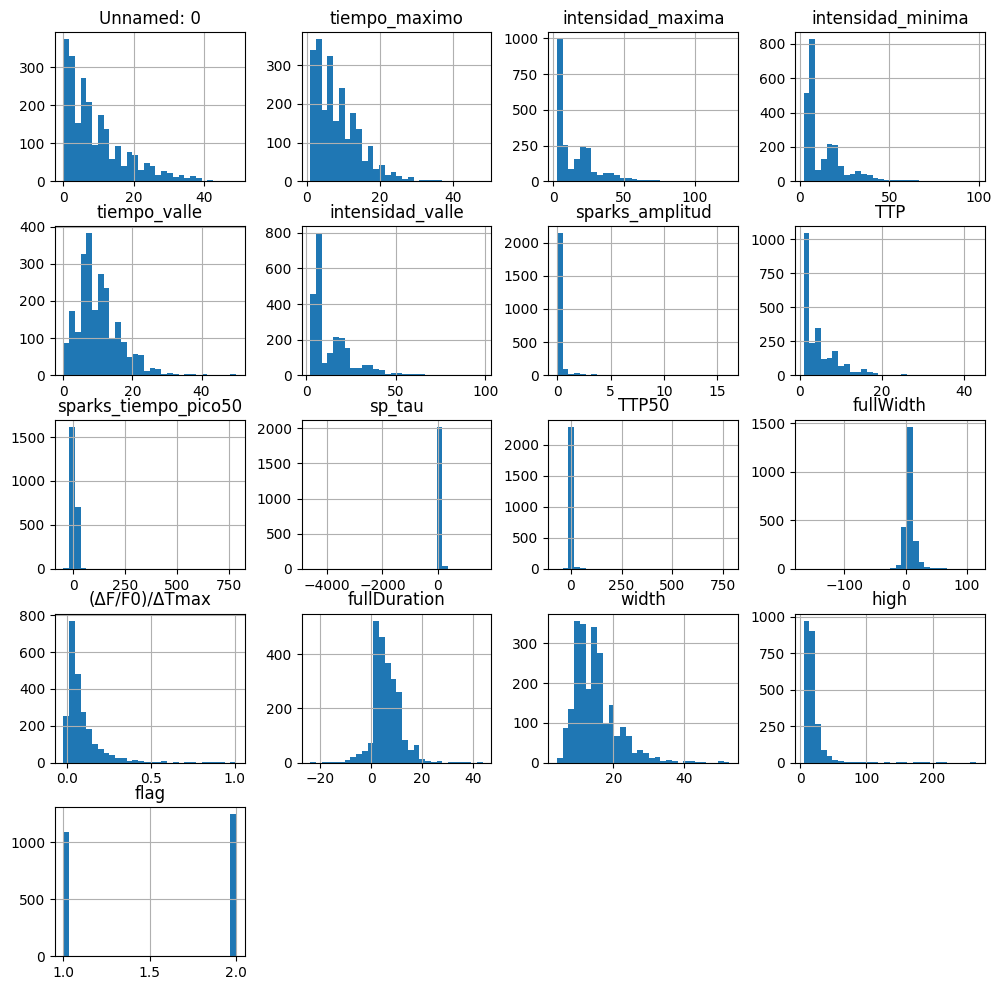

In [215]:
df.hist(figsize=(12,12), bins = 30)
plt.show()

In [171]:
df_1 = df[df["flag"] == 1]
df_2 = df[df["flag"] == 2]

In [172]:
#plt.hist([df_1["(ΔF/F0)/ΔTmax"], df_2["(ΔF/F0)/ΔTmax"]])

In [173]:
#plt.hist([df_1["fullDuration"], df_2["fullDuration"]])

In [174]:
#plt.hist([df_1["width"], df_2["width"]])

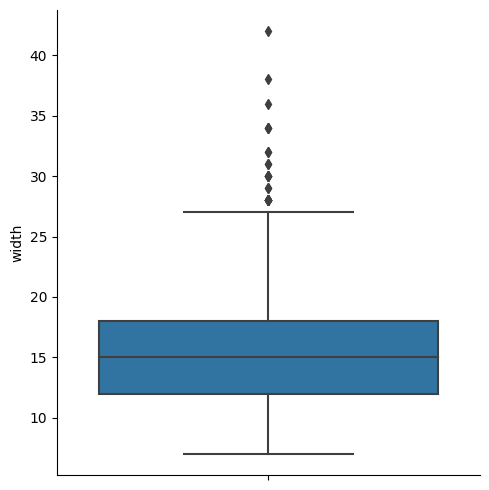

In [175]:
sns.catplot(x=None, y="width", kind="box", data = df_1)

In [54]:
#sns.catplot(x=None, y="width", kind="box", data = df_2)

In [225]:
Q1 = df["width"].quantile(0.02)
Q3 = df["width"].quantile(0.98)
IQR = Q3 - Q1
df_sin_outliers = df_1[(df["width"] >= Q1 - 1.5 * IQR) & (df["width"] <= Q3 + 1.5 * IQR)]
# En este código, Q1 y Q3 representan el percentil 2 y 98 de la columna "width", respectivamente. 
# Luego, se calcula el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1. A continuación, 
# se crea una máscara booleana idx que identifica los valores que están por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR). 
# Finalmente, se utiliza esa máscara para filtrar el DataFrame original df_1 y se asigna el resultado a df_sin_outliers .

C:\Users\Carola\AppData\Local\Temp\ipykernel_24416\3415116265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sin_outliers = df_1[(df["width"] >= Q1 - 1.5 * IQR) & (df["width"] <= Q3 + 1.5 * IQR)]


In [131]:
# En este código, Q1 y Q3 representan el percentil 2 y 98 de la columna "width", respectivamente. 
# Luego, se calcula el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1. A continuación, 
# se crea una máscara booleana idx que identifica los valores que están por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR). 
# Finalmente, se utiliza esa máscara para filtrar el DataFrame original df_1 y se asigna el resultado a df_sin_outliers .
Q1 = df_1["width"].quantile(0.05)
Q3 = df_1["width"].quantile(0.95)
IQR = Q3 - Q1
df_1_sin_outliers = df_1[(df_1["width"] >= Q1 - 1.5 * IQR) & (df_1["width"] <= Q3 + 1.5 * IQR)]

Q1 = df_2["width"].quantile(0.05)
Q3 = df_2["width"].quantile(0.95)
IQR = Q3 - Q1
df_2_sin_outliers = df_2[(df_2["width"] >= Q1 - 1.5 * IQR) & (df_2["width"] <= Q3 + 1.5 * IQR)]




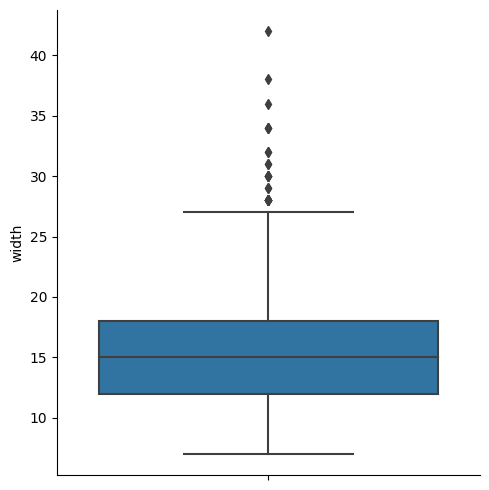

In [132]:
sns.catplot(x=None, y="width", kind="box", data=df_1_sin_outliers)

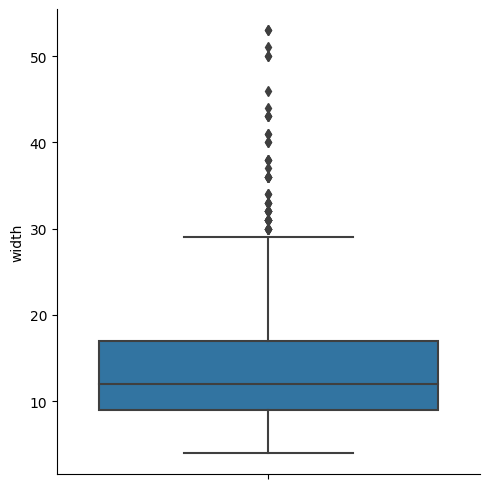

In [133]:
sns.catplot(x=None, y="width", kind="box", data=df_2_sin_outliers)

In [134]:
df_1_sin_outliers.head()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
2,2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
25,25,6.0,12.142857,9.761905,7.0,9.095238,0.243902,2.0,4.757271,3.460326,0.757271,6.0,0.121951,3.0,16.0,21.0,1.0
27,27,2.0,11.769231,9.846154,5.0,9.384615,0.195312,2.0,0.963789,14.896859,0.963789,4.0,0.097656,5.0,8.0,13.0,1.0
28,28,2.0,11.909091,9.727273,5.0,10.000000,0.224299,1.0,1.525253,21.036657,0.525253,2.0,0.224299,4.0,7.0,11.0,1.0
29,29,24.0,10.104167,7.927083,25.0,9.312500,0.274639,6.0,21.222022,12.256359,3.222022,9.0,0.045773,7.0,28.0,96.0,1.0


In [136]:
df_2_sin_outliers.head()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
3,3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0
5,5,4.0,8.090909,7.727273,5.0,7.727273,0.047059,2.0,3.344829,21.746168,1.344829,4.0,0.023529,3.0,8.0,11.0,2.0


In [179]:
df_1_sin_outliers["width"].describe()

count    1090.000000
mean       15.563303
std         4.964348
min         7.000000
25%        12.000000
50%        15.000000
75%        18.000000
max        42.000000
Name: width, dtype: float64

In [138]:
df_2_sin_outliers["width"].describe()

count    1246.000000
mean       14.262440
std         6.990825
min         4.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        53.000000
Name: width, dtype: float64

In [ ]:
tab = pd.DataFrame(df, index=['tiempo_maximo', 'intensidad_maxima', 'intensidad_minima', 
                               'tiempo_valle', 'intensidad_valle','sparks_amplitud','TTP',
                               'sparks_tiempo_pico50','sp_tau','TTP50','fullWidth','(ΔF/F0)/ΔTmax',
                               'fullDuration','width','high','flag'])

# Definir los parámetros
nivel_confianza = 0.95

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Crear una lista para almacenar los tamaños muestrales
tamanios_muestrales = []

# Recorrer las columnas del DataFrame original
for columna in tab.columns:
    # Obtener los valores de la columna y la última columna (flag)
    valores = tab[columna]
    poblacion = tab['flag']
    
    # Filtrar los valores para cada población
    poblacion_1 = valores[poblacion == 1]
    poblacion_2 = valores[poblacion == 2]
    mean1 = np.mean(poblacion1)
    mean2 = np.mean(poblacion2)
    #margen de eror dentro de cada una diferencia de medias
    # Calcular el tamaño muestral para cada población utilizando statsmodels
    tamanio_muestral_1 = ttp.solve_power(effect_size= (abs(mean1-mean2))/ poblacion_1.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')
    
    tamanio_muestral_2 = ttp.solve_power(effect_size=(abs(mean1-mean2))/ poblacion_2.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')

    # Redondear al número entero más cercano---round()para redondear numeros
    #tamanio_muestral_1 = math.ceil(tamanio_muestral_1)
    #tamanio_muestral_2 = math.ceil(tamanio_muestral_2)
    
    # Agregar los tamaños muestrales a la lista
    tamanios_muestrales.append({'Columna': columna, 'Población 1': tamanio_muestral_1, 'Población 2': tamanio_muestral_2})

# Convertir la lista en un DataFrame
tammues = pd.DataFrame(tamanios_muestrales)

# Imprimir el DataFrame de resultados
print(tammues)
import math
import pandas as pd
from statsmodels.stats.power import TTestIndPower
si te dio y me queres contar como lo solucionaste feliz y agradecida

Tamanio Muestral

In [201]:
sample_size = smp.tt_ind_solve_power(effect_size=0.5, alpha = 0.05, power=0.8)
print("El tamanio muestral es: ", int(sample_size))

El tamanio muestral es:  63


In [178]:
#Contraste de hipótesis
    #H0: los datos provienen de una distribución normal
    #H1: los datos no provienen de una distribución normal

print(ss.shapiro(df_2_sin_outliers["width"]))
print(ss.shapiro(df_1_sin_outliers["width"]))

#como p es muy peq la distribucion no es normal

ShapiroResult(statistic=0.8477550745010376, pvalue=5.590924067605381e-33)
ShapiroResult(statistic=0.9395408034324646, pvalue=1.1941276258043541e-20)


La prueba de Mann-Whitney U, también conocida como U de Mann-Whitney-Wilcoxon o prueba de rangos con signos, es un test no paramétrico utilizado para determinar si hay una diferencia significativa entre dos grupos independientes en una variable continua.

La prueba de Mann-Whitney U se utiliza cuando no se cumplen los supuestos de normalidad o igualdad de varianzas necesarios para realizar una prueba t de Student. En su lugar, se basa en los rangos de los datos para evaluar si hay una diferencia significativa entre los dos grupos.

El objetivo de la prueba de Mann-Whitney U es determinar si las muestras de dos grupos provienen de la misma población o si tienen una distribución de valores significativamente diferente. La hipótesis nula (H0) establece que no hay diferencia entre los grupos, mientras que la hipótesis alternativa (H1) establece que hay una diferencia significativa.

El procedimiento de la prueba de Mann-Whitney U implica asignar rangos a los valores de las dos muestras combinadas y calcular una estadística de prueba U. Luego, se compara el valor obtenido de la estadística de prueba con los valores críticos de la distribución de U para determinar si se rechaza o no la hipótesis nula.

Si la estadística de prueba U es menor que el valor crítico, se concluye que hay una diferencia significativa entre los grupos. En caso contrario, no se puede rechazar la hipótesis nula y se concluye que no hay evidencia suficiente para afirmar que los grupos difieren significativamente.

In [ ]:
sample_size()

Contraste de hipotesis, test no parametricos: Mann Whitney y Wiilcoxon

In [199]:

# asumir que las distribuciones tienen la misma forma
ss.mannwhitneyu(df_1_sin_outliers["width"],  df_2_sin_outliers["width"], use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)

#un valor p tan pequeño sugiere fuertemente que hay una diferencia significativa entre 
# los grupos que estás comparando. Por lo tanto, puedes concluir que existe evidencia 
# estadística sólida para rechazar la hipótesis nula y afirmar que los grupos difieren 
# de manera significativa en la variable que se está analizando

MannwhitneyuResult(statistic=838190.0, pvalue=1.0946729734710784e-22)

In [198]:
#para realizar el test de wilcoxon debemos tener columnas con igual largo. 
# Es por esto que hice un a reduccion aleatoria del numero de filas para que el largo este igualado
print(df_2_sin_outliers.shape)
print(df_1_sin_outliers.shape)
df_2_sin_outliers_red= df_2_sin_outliers.sample(1090)
print(df_2_sin_outliers_red.shape)
ss.wilcoxon(df_1_sin_outliers["width"],  df_2_sin_outliers_red["width"], zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims = False)


(1246, 17)
(1090, 17)
(1090, 17)


WilcoxonResult(statistic=201284.5, pvalue=1.0559557312667537e-12)

In [190]:
ss.wilcoxon(df_1_sin_outliers["width"], df_2_sin_outliers_red["width"], zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims = False)

WilcoxonResult(statistic=196984.0, pvalue=2.6869549995588936e-13)

para estimar los intervalos de confianza en la prueba de Mann-Whitney U, puedes seguir estos pasos:

    Realiza la prueba de Mann-Whitney U utilizando la función correspondiente en una biblioteca estadística como scipy en Python. Esta prueba compara la distribución de dos grupos y evalúa si hay una diferencia significativa entre ellos.

    Obtén el valor del estadístico de prueba U y el valor p resultante de la prueba. Estos valores te ayudarán a interpretar los resultados y a determinar si hay una diferencia significativa entre los grupos.

    Si deseas estimar un intervalo de confianza para la diferencia de medianas entre los dos grupos, puedes utilizar un enfoque de intervalo de confianza basado en la distribución exacta o aproximada de U. Estos enfoques están disponibles en algunas bibliotecas estadísticas, como scipy.stats, y dependen de las suposiciones de continuidad o independencia entre las muestras.

    También puedes utilizar métodos de aproximación, como el enfoque de normalidad asintótica, si el tamaño de la muestra es lo suficientemente grande. En este caso, puedes utilizar la fórmula del intervalo de confianza basado en la aproximación normal para la diferencia de medianas.

Es importante tener en cuenta que el cálculo de intervalos de confianza para la prueba de Mann-Whitney U puede variar según la biblioteca y el software estadístico utilizado. Asegúrate de consultar la documentación correspondiente y seguir las instrucciones específicas para obtener los intervalos de confianza adecuados para tus datos y análisis.

# Datos
data = df_1_sin_outliers["width"]


# Crea las categorías
categories = []
for value in data:
    if value <= np.percentile(data, 25):
        categories.append("Q1_width")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_width")
    elif value <= np.percentile(data, 75):
        categories.append("Q3_width")
    else:
        categories.append("Q4_width")



# Datos
datos = df_1_sin_outliers["tiempo_valle"]

# Crea las categorías
categories = []
for value in datos:
    if value <= np.percentile(data, 25):
        categories.append("Q1_tiempo_valle")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_tiempo_valle")
    elif value <= np.percentile(data, 75):
        categories.append("Q3_tiempo_valle")
    else:
        categories.append("Q4_tiempo_valle")


In [ ]:
# Datos
data = df_1_sin_outliers["width"]


# Crea las categorías
categories = []
for value in data:
    if value <= np.percentile(data, 50):
        categories.append("Q1_width")
    else:
        categories.append("Q2_width")



# Datos
datos = df_1_sin_outliers["tiempo_valle"]

# Crea las categorías
categories = []
for value in datos:
    if value <= np.percentile(data, 50):
        categories.append("Q1_tiempo_valle")
    else:
        categories.append("Q2_tiempo_valle")

In [221]:
import pandas as pd
import scipy.stats as ss

# Create the conditions using correct comparison operators
a_width = (df_1_sin_outliers["width"] > 14.815603)
b_width = (df_1_sin_outliers["width"] <= 14.815603) 

# Create a contingency table using groupby
contingency_table = df.groupby([a_width, b_width])['flag'].count()#.unstack(fill_value=0) #se supone que  con unstack me deberia dar una tabla de 2*2

# Perform the chi-square test
chi2, p_value, _, _ = ss.chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-Square Test Results:")
p

Chi-Square Test Results:


NameError: name 'p' is not defined

Test de correlación

In [216]:
#determinar si existe una asociación entre dos variables y la fuerza de esta asociación.
#Coeficiente de correlación de Pearson: Es un test paramétrico que se utiliza para medir 
# la relación lineal entre dos variables continuas. El coeficiente de correlación de Pearson
# toma valores entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica \
# ausencia de correlación, y 1 indica una correlación positiva perfecta.


from scipy.stats import pearsonr


#test de correlación de Pearson
corr, p_value = pearsonr(df_1_sin_outliers["width"], df_1_sin_outliers["tiempo_valle"])

print("Coeficiente de correlación:", corr)
print("Valor p:", p_value)

Coeficiente de correlación: 0.7505552272726981
Valor p: 5.617677044070145e-198


In [226]:
print()

<Axes: >

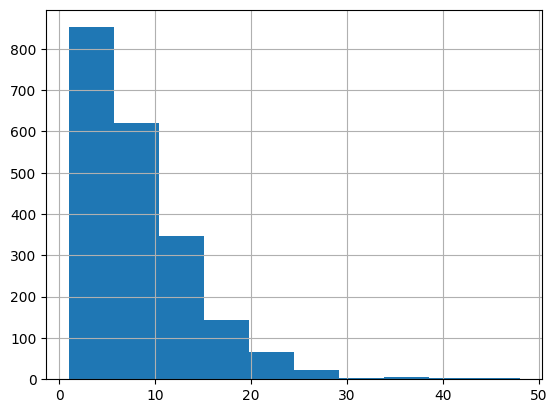

In [14]:
df["tiempo_maximo"].hist()

<Axes: >

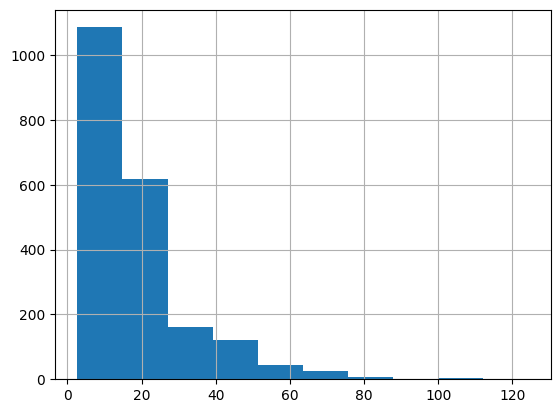

In [15]:
df["intensidad_maxima"].hist()

<Axes: >

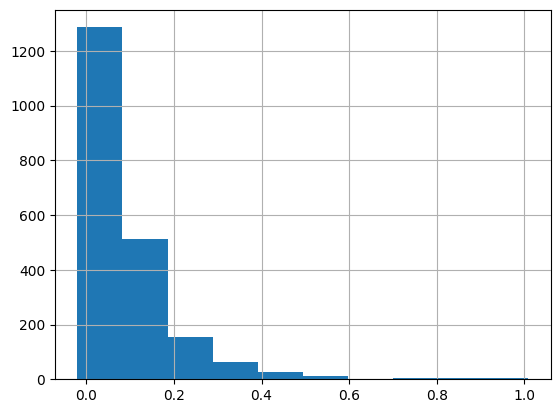

In [16]:
df["(ΔF/F0)/ΔTmax"].hist()